# Introducción a Python aplicado a las Ciencias Sociales

### Talleres Introductorios Q-Lab 2024-II
### Encargadas: Lucía Cristina Díaz Sáenz (lucia.diaz@pucp.edu.pe) y Brisa Alejandra Cruz Pacheco (cruz.brisa@pucp.edu.pe)

## **Sesión 5: Herramientas de Python para el análisis cualitativo (de texto)**

## Objetivos de esta sesión 📑📖

Comprender y aplicar ...

1.   Bibliotecas de reconocimiento de voz para la transcripción de audios.🗣
2.   Identificación de palabras o términos que se repiten en el texto.🎏
3.   Análisis gráfico para texto: nubes de palabras y otros gráficos de conteo. ☁📊
4.   Reconocimiento de secciones a partir de palabras clave.🔒🔑

**Seguimos con la dinámica de 💡 Punto extra 💡**

# **Sección 1: Transcripción de audios**

¿Quién ha tenido que transcribir un audio para algún curso? Entrevistas, discursos, focus groups... Es muy importante revisar el habla en cada una de estos, para lo cual es útil transcribir con atención. Sin embargo, **¿hay alguna manera de hacer este proceso más simple?**

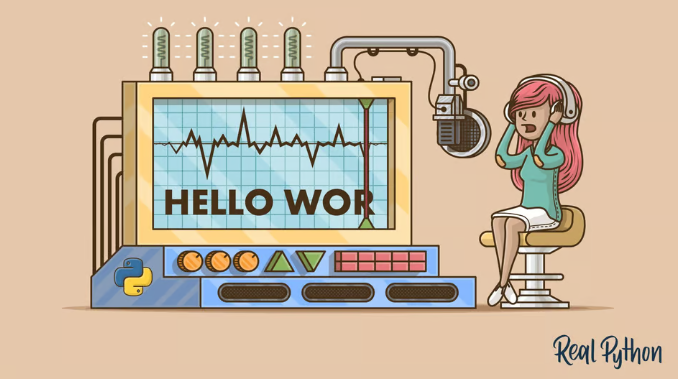

El reconocimiento de voz es una tecnología que ha evolucionado significativamente desde sus inicios en los años 50 en Bell Labs, donde los sistemas solo podían reconocer unas pocas palabras de un solo hablante. Hoy en día, los sistemas modernos pueden entender el habla de múltiples personas y en varios idiomas. **El proceso comienza con la conversión de la voz en una señal digital**, que luego es analizada utilizando modelos como el Modelo Oculto de Markov (HMM). **Estos modelos dividen la señal en fragmentos pequeños, extraen características importantes y las utilizan para identificar fonemas**, que son las unidades básicas del habla. Aunque este proceso es complejo, Python simplifica su uso al ofrecer varias APIs (Interfaz de Programación de Aplicaciones, por sus siglas en inglés) y servicios en línea que realizan el reconocimiento de voz sin necesidad de profundizar en los aspectos técnicos.

*Fuente: Real Python*

## 1.1. El paquete: SpeechRecognition

Según, *Real Python*, la biblioteca **SpeechRecognition** actúa como una capa intermediaria para varias APIs de reconocimiento de voz populares, lo que la hace muy flexible. Una de estas, la Google Web Speech API, incluye una clave API predeterminada que ya está integrada en la biblioteca, lo que te permite empezar a usarla sin necesidad de registrarte en un servicio. Esta **flexibilidad y facilidad** de uso hacen de SpeechRecognition una excelente opción para proyectos en Python. Sin embargo, no garantiza soporte para todas las características de cada API, por lo que **es necesario investigar si se adapta a tus necesidades específicas**.

En nuestro caso, SR funciona bien, pues nos permite trabajar con el idioma español.

In [1]:
# Paso 0: Importamos OS para conectar con Drive
import os
from google.colab import drive

In [2]:
drive.mount("/content/drive", force_remount=True) # montamos drive

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/datos_python") # configuramos directorio, según el nombre de nuestra carpeta

In [4]:
# Paso 1.1: Instalamos la librería SpeechRecognition

!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 50.7 MB/s eta 0:00:00


### Paso 1.2: Importamos nuestra nueva librería

In [5]:
import speech_recognition as sr

### Paso 2: Importamos nuestro archivo

In [6]:
from os import path # Necesitamos la función Path de OS

# Creamos un objeto llamado directorio actual a partir de la función getcwd (llamar a nuestro directorio de tabajo)
current_dir = os.getcwd()

# Construimos el camino a nuestro archivo de audio
# Este DEBE estar en la misma carpeta que nuestro script

AUDIO_FILE = path.join(current_dir, "audio_prueba.wav") # audio_prueba es el nombre del archivo y wav es el formato (como decir .xlsx o .csv)

In [7]:
r = sr.Recognizer() # creamos un objeto que contenga la función Recognizer de sr (nuestra librería abreviada)

with sr.AudioFile(AUDIO_FILE) as source: # usamos nuestro archivo de audio como la fuente
    audio = r.record(source)  # definimos que usaremos el audio completo

💡 **El bloque `with` en Python** se utiliza para gestionar recursos, como archivos o conexiones, de manera eficiente y segura. Al usar `with`, aseguras que el recurso se abra y cierre correctamente, incluso si ocurre un error dentro del bloque. En este caso, **`with` abre el archivo de audio y lo asigna como fuente**, garantizando que el archivo se cierre automáticamente después de que se lea el audio, evitando posibles errores o fugas de recursos.

### Paso 3: Probamos las funciones de reconocimiento de voz de SR

Sphinx y Google Speech Recognition son **servicios de reconocimiento de vo**z, y en el contexto de la biblioteca SpeechRecognition, son dos de las varias funciones disponibles para transcribir audio a texto.

- **Google Speech Recognition:** Es una función que utiliza la API de Google para convertir audio en texto. Es muy popular por su precisión y soporte para múltiples idiomas.

- **Sphinx:** Es otra función dentro de SpeechRecognition que utiliza el sistema de reconocimiento de voz CMU Sphinx (PocketSphinx), una herramienta de código abierto que no requiere conexión a internet.

a. Primero usemos Google Speech Recognition

In [8]:
# reconocer el habla usando GSR
try:
    # Usando el idioma español (es-ES) para el reconocimiento
    print("GSR cree que dijiste: " + r.recognize_google(audio, # el objeto que definimos a partir de nuestro audio completo
                                                                              language="es-ES")) # parámetro clave, define el lenguaje
except sr.UnknownValueError:
    print("Google Speech Recognition no pudo entender el audio")
except sr.RequestError as e:
    print("No se pudieron obtener resultados del servicio de GSR; {0}".format(e)) # Consultar


GSR cree que dijiste: presidente de Venezuela Hugo Chávez condenó el ataque de las Fuerzas de Defensa Israelíes contra los activistas de la Flotilla de la Libertad que llevaba ayuda humanitaria al pueblo de casa aprovecho para condenar de nuevo desde el fondo de mi alma y de mis vísceras al Estado de Israel maldito seas Estado de Israel maldito sea terroristas y asesinos y viva el pueblo palestino pueblo heroico pueblo bueno


b. Ahora probemos con Sphinx

In [ ]:
!pip install pocketsphinx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 56.7 MB/s eta 0:00:00


In [ ]:
# reconocer el habla usando Sphinx
try:
    print("Sphinx cree que dijiste: " + r.recognize_sphinx(audio, language="es-ES"))
except sr.UnknownValueError:
    print("Sphinx no pudo entender el audio")
except sr.RequestError as e:
    print("Error de Sphinx; {0}".format(e))


Error de Sphinx; missing PocketSphinx language data directory: "/usr/local/lib/python3.10/dist-packages/speech_recognition/pocketsphinx-data/es-ES"


💡 **El bloque `try` y `except` en Python se utiliza para manejar errores o excepciones que podrían ocurrir durante la ejecución del código**. Dentro de `try`, se coloca el código que podría generar un error. Si ocurre un error específico, el flujo de ejecución salta al bloque `except`, donde puedes definir cómo manejar ese error, en lugar de que el programa falle. En este caso, se maneja tanto si Google Speech Recognition no puede entender el audio (`UnknownValueError`) como si hay un problema al conectarse con el servicio (`RequestError`).

Ahora queremos algo más **pro** : probemos exportando nuestra transcripción a dos diferentes formatos de texto. Esto nos permitirá analizarla con mayor facilidad de Python.

Qué emoción. 🥲

### Paso 4, opción 1: Exportar a un documento word (docx)

In [9]:
pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 8.4 MB/s eta 0:00:00


In [10]:
# GSR exportando el output a un docx

from docx import Document

doc = Document() # le llamamos doc a la función de crear un documento

try:
    recognized_text = r.recognize_google(audio, language="es-ES")
    doc.add_paragraph(recognized_text)
except sr.UnknownValueError:
    doc.add_paragraph("G no pudo entender el audio")
except sr.RequestError as e:
    doc.add_paragraph("Error de G; {0}".format(e))

# Guardar el documento
doc.save("transcrip_audio.docx")

### Paso 4, opción 2: Exportar a formato txt

In [ ]:
# GSR exportando el output a un archivo de texto solo si es exitoso

try:
    recognized_text = r.recognize_google(audio, language="es-ES")
    with open("transcrip_audio.txt", "w", encoding="utf-8") as file:
        file.write(recognized_text)
    print("Transcripción exitosa y guardada en transcrip_audio.txt")
except sr.UnknownValueError:
    print("Google Speech Recognition no pudo entender el audio")
except sr.RequestError as e:
    print("Error de Google Speech Recognition; {0}".format(e))


Transcripción exitosa y guardada en transcrip_audio.txt


### Paso 4, opción 3: Exportar a formato csv

In [11]:
import csv

# GSR exportando el output a un archivo CSV solo si es exitoso

try:
    recognized_text = r.recognize_google(audio, language="es-ES")
    with open("transcrip_audio.csv", "w", newline='', encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Transcripción"])  # Encabezado de la columna
        writer.writerow([recognized_text])
    print("Transcripción exitosa y guardada en transcrip_audio.csv")
except sr.UnknownValueError:
    print("Google Speech Recognition no pudo entender el audio")
except sr.RequestError as e:
    print("Error de Google Speech Recognition; {0}".format(e))


Transcripción exitosa y guardada en transcrip_audio.csv


### **Ahora probamos lo mismo pero con un audio diferente**

Empezamos importando el audio mp3 a formato wav (el formato que lee SR). En este caso, trabajaremos con algo breve, pero podrían hacerlo con archivos más pesados (y útiles al análisis social) como discursos presidenciales o entrevistas.

**Paso 0: transformamos el audio mp3 a wav** https://convertio.co/es/mp3-wav/

### Paso 1-3: repetimos lo anterior, pero llamando a un nuevo archivo

In [12]:
AUDIO_FILE = path.join(current_dir, "audio_fe.wav") # audio_prueba es el nombre del archivo y wav es el formato (como decir .xlsx o .csv)

In [13]:
# Volvemos a definir los atajos por si acaso

r = sr.Recognizer() # creamos un objeto que contenga la función Recognizer de sr (nuestra librería abreviada)

with sr.AudioFile(AUDIO_FILE) as source: # usamos nuestro archivo de audio como la fuente
    audio = r.record(source)  # definimos que usaremos el audio completo

In [14]:
# exportamos modo txt
try:
    recognized_text = r.recognize_google(audio, language="es-ES")
    with open("transcrip_la_fe.txt", "w", encoding="utf-8") as file:
        file.write(recognized_text)
    print("Transcripción exitosa y guardada en transcrip_audio.txt")
except sr.UnknownValueError:
    print("Google Speech Recognition no pudo entender el audio")
except sr.RequestError as e:
    print("Error de Google Speech Recognition; {0}".format(e))

Transcripción exitosa y guardada en transcrip_audio.txt


# **Sección 2: Análisis de texto**

Trabajaremos utilizando la librería wordcloud :)

Veremos cómo hacer nubes de palabras y editarlas.

In [ ]:
# Open the file in read mode
text = open("transcrip_audio.txt", "r")

## Contemos ocurrencias de palabras

In [ ]:
# Crear un diccionario vacío
d = dict()

# Loop por cada línea
for linea in text:
    # Eliminar los espacios iniciales de nueva línea
    linea = linea.strip()

    # Convertir los caracteres en la línea a minúsculas para evitar discrepancias de mayúsculas
    linea = linea.lower()

    # Dividir la línea en palabras
    palabras = linea.split(" ")

    # Iterar sobre cada palabra en la línea
    for palabra in palabras:
        # Verificar si la palabra ya está en el diccionario
        if palabra in d:
            # Incrementar el conteo de la palabra en 1
            d[palabra] = d[palabra] + 1
        else:
            # Agregar la palabra al diccionario con conteo 1
            d[palabra] = 1

# Imprimir el contenido del diccionario
for key in list(d.keys()):
    print(key, ":", d[key])

presidente : 1
de : 11
venezuela : 1
hugo : 1
chávez : 1
condenó : 1
el : 3
ataque : 1
las : 1
fuerzas : 1
defensa : 1
israelíes : 1
contra : 1
los : 1
activistas : 1
la : 2
flotilla : 1
libertad : 1
que : 1
llevaba : 1
ayuda : 1
humanitaria : 1
al : 2
pueblo : 4
gaza : 1
aprovecho : 1
para : 1
condenar : 1
nuevo : 1
desde : 1
fondo : 1
mi : 1
alma : 1
y : 3
mis : 1
vísceras : 1
estado : 2
israel : 2
maldito : 2
seas : 1
sea : 1
terroristas : 1
asesinos : 1
viva : 1
palestino : 1
heroico : 1


### Aprovechemos y aprendamos...¿qué es un loop?

A veces no queremos repetir un bloque de codigo una y otra y otra vez. Entonces, usamos loops :)



### Loop for

- El bucle for en Python se utiliza para iterar sobre una secuencia (que puede ser una lista, una tupla, un diccionario, un conjunto o una cadena de caracteres). Es comúnmente usado cuando sabes de antemano cuántas veces quieres que se ejecute el bucle, o cuando quieres ejecutar una acción para cada elemento de una secuencia.

In [ ]:
# Iterar sobre una lista
for numero in [1, 2, 3, 4, 5]:
    print(numero)

1
2
3
4
5


### Loop while

- El bucle while ejecuta un bloque de código mientras una condición dada es verdadera. Se utiliza cuando no se sabe con antelación cuántas veces será necesario ejecutar el bucle, y el número de iteraciones depende de alguna condición que se evalúa en tiempo de ejecución.

In [ ]:
contador = 0
while contador < 5:
    print(contador)
    contador += 1

0
1
2
3
4


### Control de bucles

break: Sale del bucle inmediatamente, sin importar el estado de la condición del bucle.
continue: Salta el resto del código dentro del bucle para esa iteración y continúa con la siguiente iteración.
else: Se ejecuta un bloque de código una vez después de que el bucle termina, pero solo si el bucle no fue terminado por un break

### Control condicional

### if

if te permite evaluar una condición y ejecutar un bloque de código si esa condición es verdadera. Es la forma más básica de toma de decisiones en programación.

In [ ]:
edad = 18
if edad >= 18:
    print("Eres mayor de edad.")

Eres mayor de edad.


### else

else se usa en combinación con if. Proporciona un bloque de código que solo se ejecuta si la condición en la declaración if correspondiente no se cumple (es decir, es falsa).

In [ ]:
edad = 16
if edad >= 18:
    print("Eres mayor de edad.")
else:
    print("No eres mayor de edad.")

### elif

In [ ]:
edad = 16
if edad >= 18:
    print("Eres mayor de edad.")
elif edad < 12:
    print("Eres un niño.")
else:
    print("Eres un adolescente.")

En este caso, hay tres bloques de código: uno se ejecuta si la persona es mayor de edad, otro si es un niño (menor de 12 años), y el último si ninguna de las condiciones anteriores es verdadera, indicando que la persona es un adolescente.

## Nubes de palabras

In [ ]:
!pip install wordcloud

Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
# Abrir el archivo y leer el contenido directamente
with open("transcrip_audio.txt", "r") as file:
    text = file.read()

Generamos una nube de palabras del objeto "text" :)

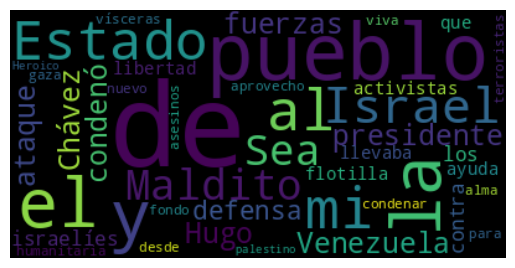

In [ ]:
# Creamos la nube:
wordcloud = WordCloud().generate(text)

# Mostramos la nube:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

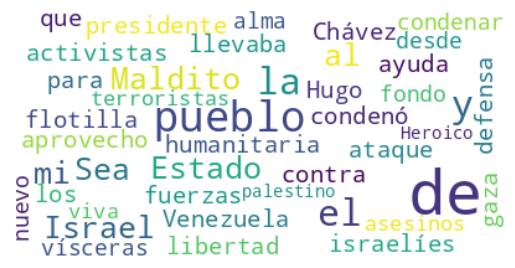

In [ ]:
# disminuimos el font_size, cambiamos el máximo de palabras y hacemos el fondo de color blanco
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Nuestra nube de palabras funciona! Pero tiene muchas palabras que no sirven para el análisis. A esas palabras, las llamaremos "stopwords".

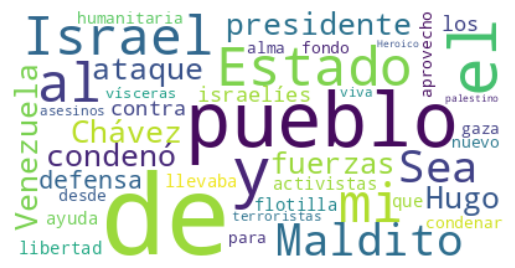

In [ ]:
# Creamos lista de palabras con stopwords
stopwords = (["la", "las", "en", "este", "un"])

# Generamos el Wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Mostramos los resultados :)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Hay muchas stopwords en español. Ahora trabajaremos con una lista pre-hecha.

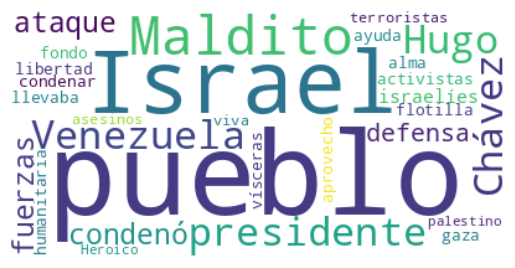

In [ ]:
# Leer las stopwords del archivo
with open("stopwords_esp.txt", "r") as file:
    stopwords = set(file.read().split())  # Esto asume que cada stopword está separada por espacios o nuevas líneas

# Generar el WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Mostrar el WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Guardar imagen :)
wordcloud.to_file("nube1.png")

También podemos hacer nubes de palabras más complejas! Usaremos un audio de Susy Diaz y lo pondremos en la forma de la bandera del Perú.

Lo primero que tenemos que hacer es importar el archivo.

In [ ]:
# Abrir el archivo y leer el contenido directamente
with open("transcrip_la_fe.txt", "r") as file:
    text_fe = file.read()

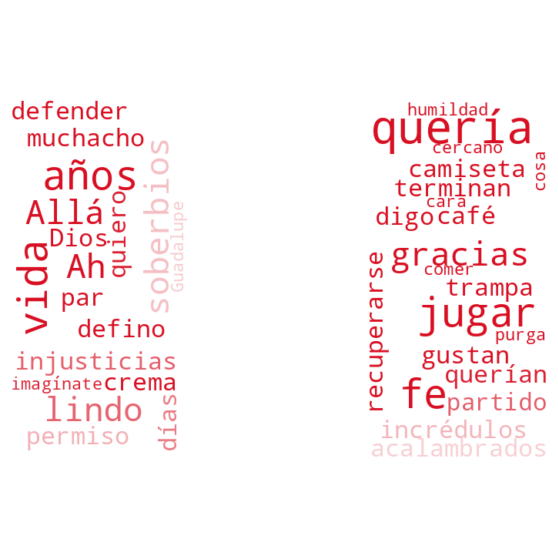

In [ ]:
# Genero mi Wordcloud
mask = np.array(Image.open("peru.png"))
wordcloud_peru = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text_fe)

# Creo los colores a partir de una imagen
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_peru.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()


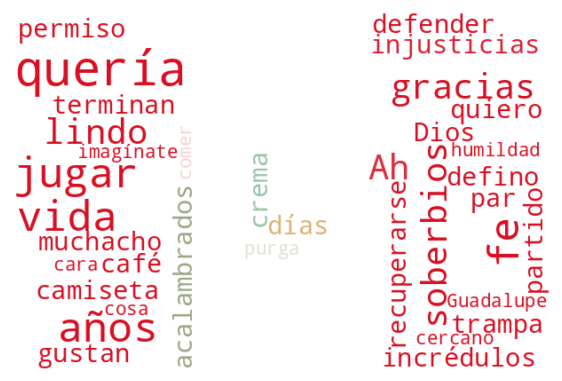

In [ ]:
# Genero mi Wordcloud
mask = np.array(Image.open("peru2.png"))
stopwords.update(["Allá", "digo", "querían"])
wordcloud_peru = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text_fe)

# Creo los colores a partir de una imagen
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_peru.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# store to file
plt.savefig("perucloud.png", format="png")

<Figure size 640x480 with 0 Axes>

# **Sección 3: Aplicación al análsis de un discurso presidencial 🏅**

Ahora aplicaremos nuestro conocimientos al último discurso presidencial de Dina Boluarte. Trabajaremos con el documento PDF disponible en internet.

### Paso 1: Extraer el texto del PDF

In [ ]:
!pip install PyPDF2

In [ ]:
import PyPDF2  # Librería para trabajar con PDFs
import re  # Librería para expresiones regulares y limpieza de texto

In [ ]:
pdf_path = "Mensaje_a_la_Nacion_2024_Dina_Boluarte.pdf"

In [ ]:
def extraer_texto_pdf(pdf_path):
    # Abrimos el archivo PDF en modo lectura binaria
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)  # Creamos un lector de PDF
        texto = ""  # Inicializamos una variable para almacenar el texto
        # Iteramos sobre cada página del PDF
        for page in reader.pages:
            texto += page.extract_text()  # Extraemos el texto de cada página y lo agregamos a 'texto'
    return texto  # Retornamos el texto completo extraído del PDF

# Uso de la función para extraer el texto
texto_extraido = extraer_texto_pdf(pdf_path)

# Imprimir el texto extraído (opcional, solo para verificar)
print(texto_extraido)

 
1 
  
 
 
 
 
 
 
 
 
 
 
 
 
 
Mensaje a la Nación  
 
Presidenta de la República,  
Dina Ercilia Boluarte Zegarra  
 
28 de julio de 202 4 
 
 
Página 2 de 79 
  
 
 
MENSAJE A LA NACIÓN DE LA  
PRESIDENTA DE LA REPÚBLICA,  
 DINA ERCILIA BOLUARTE ZEGARRA  
28 de julio del 2024  
 
 
Contenido  
Síntesis del período  ................................ ................................ ................................ ...............  4 
Cumpliendo compromisos: lo que hemos avanzado con estabilidad, honestidad y 
esfuerzo  ................................ ................................ ................................ ................................ .......  5 
Eje: Más infraestructura y servicios para una mejor calidad de vida  .............................  5 
Eje: Reactivación económica  ................................ ................................ .............................  10 
Eje: Impulso al desarrollo de los departamentos ................................ .............

### Paso 2: limpiar el texto 🧹

In [ ]:
def limpiar_texto(texto_extraido):
    # Elimina caracteres especiales y convierte a minúsculas
    texto_limpio = re.sub(r'[^\w\s]', '', texto_extraido).lower()
    return texto_limpio

# Creamos una lista de stopwords (palabras comunes que no queremos contar)
stopwords = ["la", "las", "en", "este", "un", "el", "y", "de",
             "es","que", "a", "los", "del", "con", "para", "se",
             "una", "uno", "más", "por", "al", "su", "como"]

###  Paso 3: Contamos palabras ☝

In [ ]:
!pip install Counter

  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5393 sha256=8b4e2a217d37383224886da1cd698e0a855459dc6f2b9c402c3708fd6461de43
  Stored in directory: /root/.cache/pip/wheels/e3/02/6d/d5c0838427a060718c6060ae4d24da95a0e0df0d7a3dab8040
Successfully built Counter


In [ ]:
from collections import Counter

In [ ]:
def contar_palabras(texto_limpio):
    # Divide el texto en palabras
    palabras = texto_limpio.split()
    # Filtra las palabras para eliminar las stopwords
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords]
    # Cuenta las palabras filtradas
    conteo = Counter(palabras_filtradas)
    return conteo

### Paso 4: Definimos una función para obtener las palabras más usadas ⏰

In [ ]:
def obtener_mas_usadas(conteo, n=10):
    # Retorna las n palabras más comunes
    return conteo.most_common(n)

### Paso 5: Llamar a las funciones para procesar el texto extraído 🏭

In [ ]:
texto_limpio = limpiar_texto(texto_extraido)  # Limpiar el texto extraído
conteo_palabras = contar_palabras(texto_limpio)  # Contar palabras en el texto limpio
palabras_mas_usadas = obtener_mas_usadas(conteo_palabras)  # Obtener las 10 palabras más usadas

### Paso 6: Imprimimos los resultados y apreciamos el esfuerzo de nuestro trabajo 🐱

In [ ]:
print("Las 10 palabras más usadas por Dina Boluarte son:", palabras_mas_usadas)

Las 10 palabras más usadas por Dina Boluarte son: [('millones', 194), ('mil', 171), ('nuestro', 149), ('nacional', 145), ('inversión', 130), ('país', 123), ('año', 122), ('soles', 121), ('gobierno', 116), ('perú', 103)]


### 💡 **¿Cómo podríamos mejorar nuestro resultado?** 💡

### Paso 7: Ahora graficamos bonito!!!

### Opción 1: Nube de palabras ☁

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

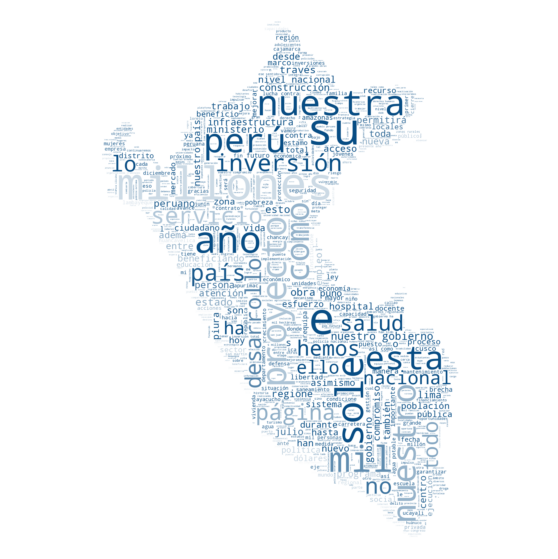

In [ ]:
# Genero mi Wordcloud
mask = np.array(Image.open("perumapa.png"))
wordcloud_peru = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(texto_limpio)

# Creo los colores a partir de una imagen
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_peru.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

### Opción 2: Gráfico de barras 📊

In [ ]:
import matplotlib.pyplot as plt

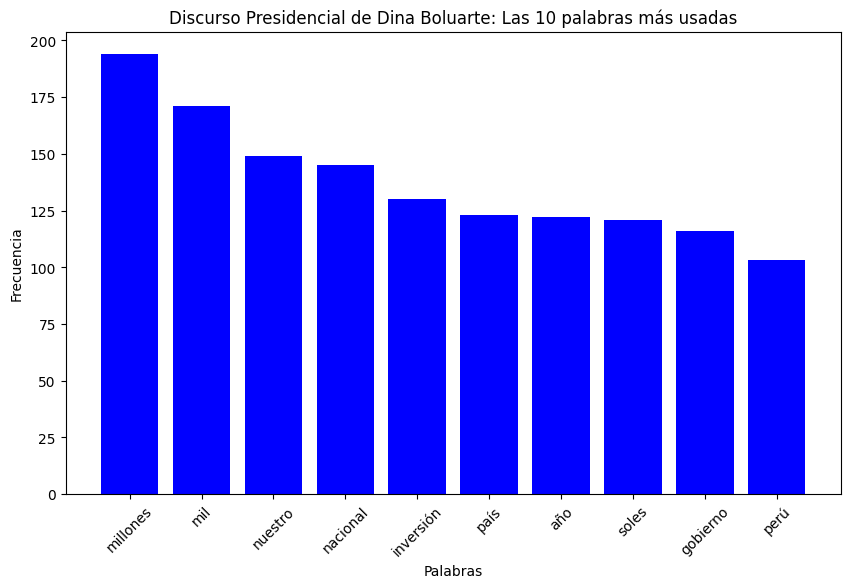

In [ ]:
# Separar las palabras y sus frecuencias
palabras, frecuencias = zip(*palabras_mas_usadas)

# Crear el bar plot
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='blue')

# Añadir título y etiquetas
plt.title('Discurso Presidencial de Dina Boluarte: Las 10 palabras más usadas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad
plt.show()

# Páginas usadas hoy ⛽

*   https://realpython.com/python-speech-recognition/
*   https://convertio.co/es/mp3-wav/

